## IMPORT DATA

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, mean_absolute_error, mean_squared_error, r2_score

In [54]:
df = pd.read_csv("players_stats_by_season_full_details.csv")

## SUPERVISED LEARNING

In [55]:
X = df[['3PM', 'PTS']]
y = df['Stage']

In [56]:
y = np.where(y == 'International', 1, -1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Untuk Melatih Data

In [58]:
svm = SVC(kernel="rbf")

Untuk Melatih Klasifikasi

In [59]:
svm.fit(X_train, y_train)

SVC()

In [60]:
y_pred = svm.predict(X_test)

In [61]:
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

/Users/onnyfahrony/Auzan_127/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


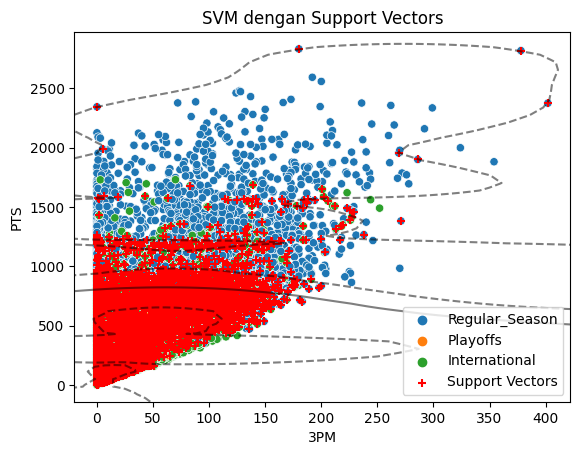

In [63]:
sns.scatterplot(x='3PM', y='PTS', hue='Stage', data=df)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=40, color='red', marker='+', label='Support Vectors')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), np.linspace(ylim[0], ylim[1]))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
linestyles=['--', '-', '--'])
plt.xlabel('3PM')
plt.ylabel('PTS')
plt.legend(loc='lower right')
plt.title('SVM dengan Support Vectors')
plt.show()

Untuk Melihat hasil report

In [40]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.80      0.27      0.40      2263
           1       0.89      0.99      0.94     13922

    accuracy                           0.89     16185
   macro avg       0.85      0.63      0.67     16185
weighted avg       0.88      0.89      0.86     16185



## UNSUPERVISED LEARNING

## K-MEANS

In [41]:
X = df[["3PM", "PTS"]]
k = 2

In [43]:
kmeans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

In [44]:
cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

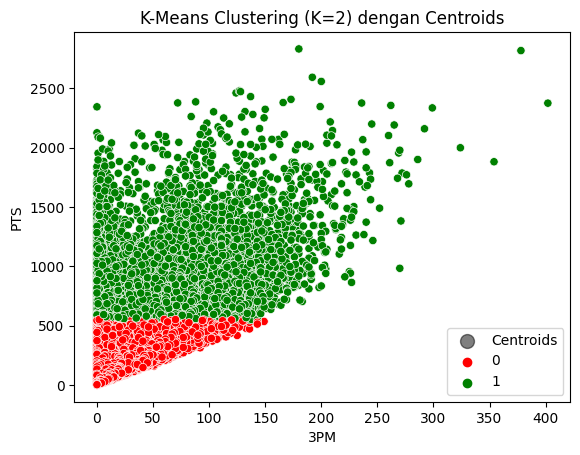

In [46]:
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='black', s=100, label='Centroids')
sns.scatterplot(data=df, x="3PM", y="PTS", hue="cluster", palette=["red", "green"])
plt.title(f"K-Means Clustering (K={k}) dengan Centroids")
plt.xlabel("3PM")
plt.ylabel("PTS")
plt.legend()
plt.show()

In [47]:
cross_tab = pd.crosstab(df["cluster"], df["Stage"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
Stage    International  Playoffs  Regular_Season
cluster                                         
0                43108      2952            1457
1                 3208        23            3201 



In [49]:
ari = adjusted_rand_score(df["Stage"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.33


In [50]:
true_labels_num = df["Stage"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

Normalized Mutual Information (NMI): 0.21


In [51]:
homogeneity = homogeneity_score(df["Stage"], cluster_labels)
completeness = completeness_score(df["Stage"], cluster_labels)
v_measure = v_measure_score(df["Stage"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 0.19
Completeness Score: 0.25
V-Measure Score: 0.21
